## Observations and Insights 

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how='outer')

# Display the data table for preview
combined_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
# Checking the number of mice.
number_of_mice = combined_data['Mouse ID'].nunique()
number_of_mice

249

In [14]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRowsDF = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
print(duplicateRowsDF )

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data.sort_values("Mouse ID", inplace = True)
cleaned_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
460,a203,Infubinol,Female,20,23,30,59.523197,1
461,a203,Infubinol,Female,20,23,35,61.931650,2
459,a203,Infubinol,Female,20,23,25,56.793208,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,20,57.898778,2
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4


In [16]:
# Checking the number of mice in the clean DataFrame.
cleaned_data['Mouse ID'].nunique()

249

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_stats = cleaned_data.groupby('Drug Regimen').agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        tumor_vol_mean=('Tumor Volume (mm3)', np.mean),\
        # Get the median of the 'Tumor Volume (mm3)' column\
        tumor_vol_median=('Tumor Volume (mm3)', np.median),\
        # Get the variance of the 'Tumor Volume (mm3)' column\
        tumor_vol_var=('Tumor Volume (mm3)', np.var),\
        # Get the standard deviation of the 'Tumor Volume (mm3)' column\
        tumor_vol_stdev=('Tumor Volume (mm3)', np.std),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        tumor_vol_sem=('Tumor Volume (mm3)', st.sem)\
).round(3)


regimen_stats

,tumor_vol_mean,tumor_vol_median,tumor_vol_var,tumor_vol_stdev,tumor_vol_sem
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.387,50.784,43.243,6.576,0.526
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

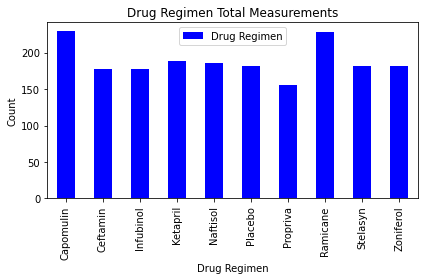

In [18]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_pd = cleaned_data.groupby('Drug Regimen')

drug_count_pd = pd.DataFrame(drug_pd['Drug Regimen'].count())

drug_regimen_pd = drug_count_pd.plot(kind='bar', title="Drug Regimen Total Measurements", color="blue")

drug_regimen_pd.set_xlabel("Drug Regimen")
drug_regimen_pd.set_ylabel("Count")
plt.tight_layout()

plt.show()


Text(0, 0.5, 'Count')

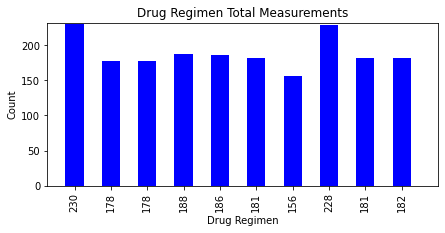

In [19]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drug_count_pd))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(7,3))
plt.bar(x_axis, drug_count_pd["Drug Regimen"], color='blue', align="center", width = 0.50)
plt.xticks(tick_locations, drug_count_pd["Drug Regimen"], rotation="vertical")

plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(drug_count_pd['Drug Regimen'])+2)

plt.title("Drug Regimen Total Measurements")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")




In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_group = cleaned_data.groupby('Sex')
gender_group_count = pd.DataFrame(gender_group['Sex'].count())
gender_group_count

,Sex
Sex,
Female,930
Male,958


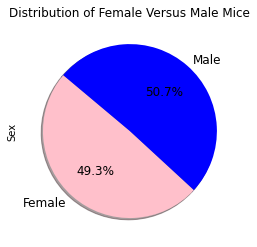

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_group_count.plot(kind='pie', y='Sex', 
                        title="Distribution of Female Versus Male Mice",startangle=140,
                        autopct='%1.1f%%',shadow=True, fontsize=12, colors =["pink","blue"],legend =False); 

## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

four_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse

four_drugs = combined_data[combined_data['Drug Regimen'].isin(four_drug_list)]
four_drugs = four_drugs.reset_index(drop=True).head()
four_drugs

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,30,59.523197,1
1,a203,Infubinol,Female,20,23,35,61.931650,2
2,a203,Infubinol,Female,20,23,25,56.793208,1
3,a203,Infubinol,Female,20,23,20,55.173336,1
4,a203,Infubinol,Female,20,23,15,52.777870,1


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
